In [1]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [2]:
# Get the seed
import numpy as np
np.random.seed(2676)

In [3]:
# Get the data
all_data = pd.read_csv("input_data/model_ready_data.csv")

### Test/Train Split

In [4]:
# Get the y and x data in different variables
y_label = all_data["PRICE"]
X_data = all_data.drop(columns=["PRICE", "index", "TYPE", "LOCALITY", "SUBLOCALITY"])

# Split the data into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_data, y_label, test_size=0.3, random_state=43)

In [5]:
print(f"X Train Data Length = {len(train_X)} \t\t X Test Data Length = {len(test_X)} \n Y Train Data Length = {len(train_y)} \t\t Y Test Data Length = {len(test_y)}")

X Train Data Length = 3357 		 X Test Data Length = 1440 
 Y Train Data Length = 3357 		 Y Test Data Length = 1440


### XGBoost Decision Tree Model

In [6]:
# Create an XGBoost Regressor
xgboost_model = XGBRegressor(n_estimators=100, random_state=30, max_depth=3, learning_rate=0.45)

# Train the model on the training data
xgboost_model.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.45, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=30, ...)

In [7]:
# Make predictions on the test data
y_pred = xgboost_model.predict(test_X)

### Model Prediction Statistics

In [8]:
# Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Coefficient of Determination (R-squared)
r_squared = r2_score(test_y, y_pred)
print(f'Coefficient of Determination (R-squared): {r_squared}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Define the number of folds (k)
# You can adjust this based on your preference
num_folds = 5  

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation for R-squared
cross_val_r_squared = cross_val_score(xgboost_model, train_X, train_y, cv=kf, scoring='r2')

# Display the results
print(f'K-fold Cross-validated R-squared: {np.mean(cross_val_r_squared)}')

Mean Squared Error (MSE): 5405796176469.194
Coefficient of Determination (R-squared): 0.6621435801714401
Mean Absolute Error (MAE): 847446.5373335097
Root Mean Squared Error (RMSE): 2325036.8118524905
K-fold Cross-validated R-squared: 0.35935911730026715


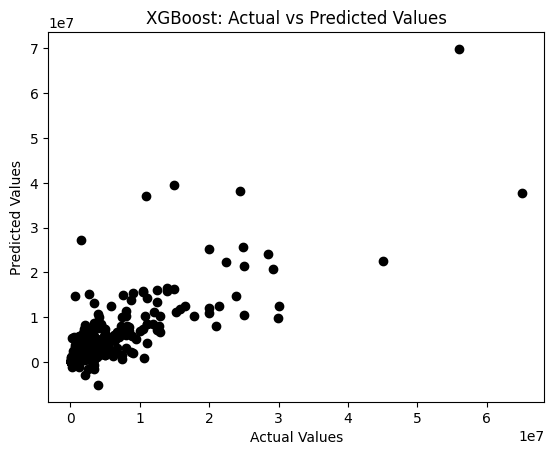

In [9]:
# Plot outputs
plt.scatter(test_y, y_pred, color="black")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost: Actual vs Predicted Values")
plt.savefig('output/xgboost.jpg')
plt.show()

In [10]:
# Get feature importances
feature_importances = xgboost_model.feature_importances_

# Create a DataFrame to display the feature importances
coeff = pd.DataFrame(list(zip(train_X.columns, feature_importances)), columns=['Feature', 'Importance'])
coeff.sort_values('Importance', ascending=False, inplace=True)

# Print the sorted DataFrame
print(coeff)

                               Feature  Importance
8               TYPE_is_Condo for sale    0.201742
24         LOCALITY_is_New York County    0.174766
4                                STATE    0.105339
5                          STREET_NAME    0.100841
3                         PROPERTYSQFT    0.093472
16  TYPE_is_Multi-family home for sale    0.069725
1                                 BEDS    0.045877
0                          BROKERTITLE    0.040436
6               TYPE_is_Co-op for sale    0.038595
2                                 BATH    0.035463
46      SUBLOCALITY_is_Richmond County    0.023149
18          TYPE_is_Townhouse for sale    0.022052
40            SUBLOCALITY_is_Manhattan    0.015403
42      SUBLOCALITY_is_New York County    0.010650
39         SUBLOCALITY_is_Kings County    0.005411
13              TYPE_is_House for sale    0.003799
11                    TYPE_is_For sale    0.003109
22            LOCALITY_is_Kings County    0.002297
23                LOCALITY_is_N

(-0.001, 0.04)

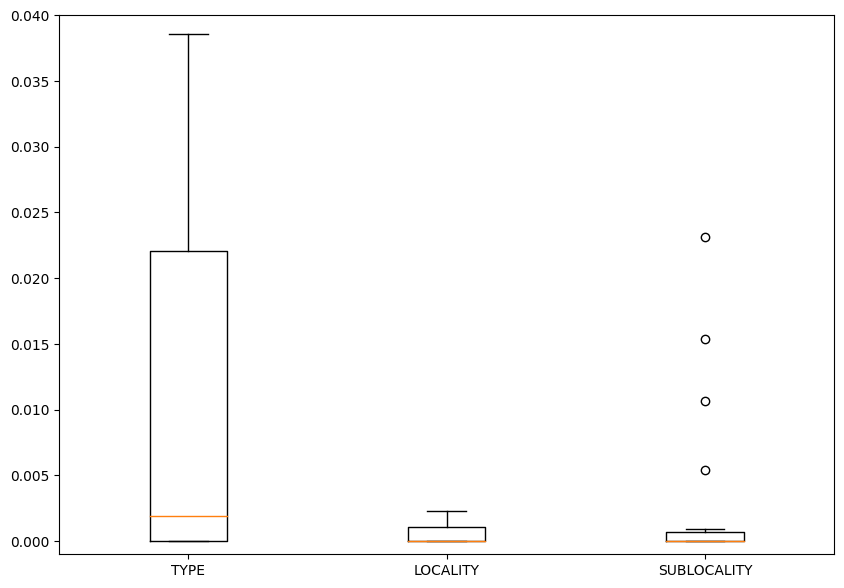

In [11]:
one_hot_attribute_list = ["TYPE", "LOCALITY", "SUBLOCALITY"]

features = coeff["Feature"]
weights = coeff["Importance"]

box_plot_dict = {
    "TYPE": [],
    "LOCALITY": [],
    "SUBLOCALITY": [],
}

for attribute in one_hot_attribute_list:
    for i in range(len(features)):
        feature = str(features[i])
        if feature.startswith(attribute):
            box_plot_dict[attribute].append(weights[i])

fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot([box_plot_dict["TYPE"], box_plot_dict["LOCALITY"], box_plot_dict["SUBLOCALITY"]])
plt.xticks(range(1, len(one_hot_attribute_list) + 1), one_hot_attribute_list)
plt.ylim([-0.001, 0.04])